<a href="https://colab.research.google.com/github/GavriYadlin97/MultiDimensional-Perceptron/blob/main/ex11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Yadlin
ID: 318263753
Date: 10/01/2024

The following section depict the implementation of a multi-class PLA.
Instead of using a single column vector for each number, I'm using a matrix, in which each column is the weight vector, i.e.: the matrix $W$ is constructed from the column vectors $w_i$:

\begin{equation}
W = \begin{pmatrix}
    | &|& & | \\
    w_0 & w_1 &  \cdots & w_9 \\
    | &|& & |
\end{pmatrix}
\end{equation}

The first part is the preperation of the data, and incorpetating the bias term.
Takes about a minute to fetch the data set.

In [ ]:
# Fetch mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from tabulate import tabulate
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split data to training and testing.
X, y = mnist['data'], mnist['target']
y = y.astype(int)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=1 / 7, shuffle=True)

# Add a bias term to input data.
XTrain = np.c_[XTrain, np.ones(XTrain.shape[0])]
XTest = np.c_[XTest, np.ones(XTest.shape[0])]

XTrain = normalize(XTrain, axis=1, norm='l2')
XTest = normalize(XTest, axis=1, norm='l2')

# Define perceptron parameters.
input_size = XTrain.shape[1]
output_size = 10

The second part of the code is the training and the calculation of the loss function. This part take approximately 3 to 3.5 minutes.
Progress is shown using tqdm library.

100%|██████████| 100/100 [03:13<00:00,  1.93s/it]


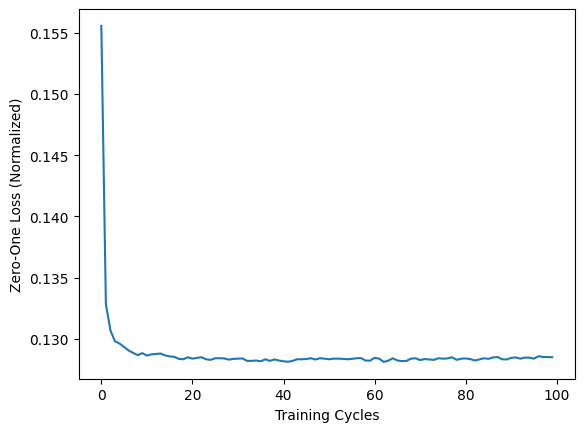

In [ ]:
# Initialize weights and bias.
Wid = 0

W = np.random.randn(input_size, output_size)
W = normalize(W, axis=0, norm='l2')

# Initialize lists to store loss values for visualization.
loss_history_W = []
zero_one_loss_history_W = []

# Initialize a dictionary to store confusion matrices for each letter
confusion_matrices = {i: None for i in range(10)}

# Initialize dictionaries to store metrics for each letter
accuracy_dict = {i: [] for i in range(10)}
sensitivity_dict = {i: [] for i in range(10)}
selectivity_dict = {i: [] for i in range(10)}

# Init cycles.
trainingCycle = 100

# Number of training cycles between testing on a subset of the training data
test_interval = 10

for j in tqdm(range(trainingCycle)):
    learningRate = 1 / ((1 + j) * 100)

    loss_W = 0  # Zero-one loss for W

    for i in range(XTrain.shape[0]):
        xi = XTrain[i, np.newaxis].T
        yi = yTrain.iloc[i]
        if np.argmax(W.T @ xi) != yi:
            loss_W += 1
            correction = -1 * np.ones((output_size, 1))
            correction[yi] = 1
            W += learningRate * xi @ correction.T

    # Periodically test on a subset of the training data
    #if j % test_interval == 0:
    start_index = np.random.randint(0, 59000)
    subset_XTrain = XTrain[start_index:start_index + 1000, :]
    subset_yTrain = yTrain.iloc[start_index:start_index + 1000]
    subset_predictions = np.argmax(subset_XTrain @ W, axis=1)
    cor = np.sum(subset_predictions == subset_yTrain.values)
    if Wid < cor:
        minW = W
        Wid = cor

    # Update loss history for visualization
    loss_history_W.append(loss_W)
    zero_one_loss_history_W.append(loss_W / XTrain.shape[0])

# Visualize zero-one loss function
plt.plot(range(trainingCycle), zero_one_loss_history_W, label='W')
plt.xlabel('Training Cycles')
plt.ylabel('Zero-One Loss (Normalized)')
plt.show()

As can be seen, a good level of prediction is achieved after less than 20 cycles

The final part test the resulted weight matrix and provides the final results and statistics.

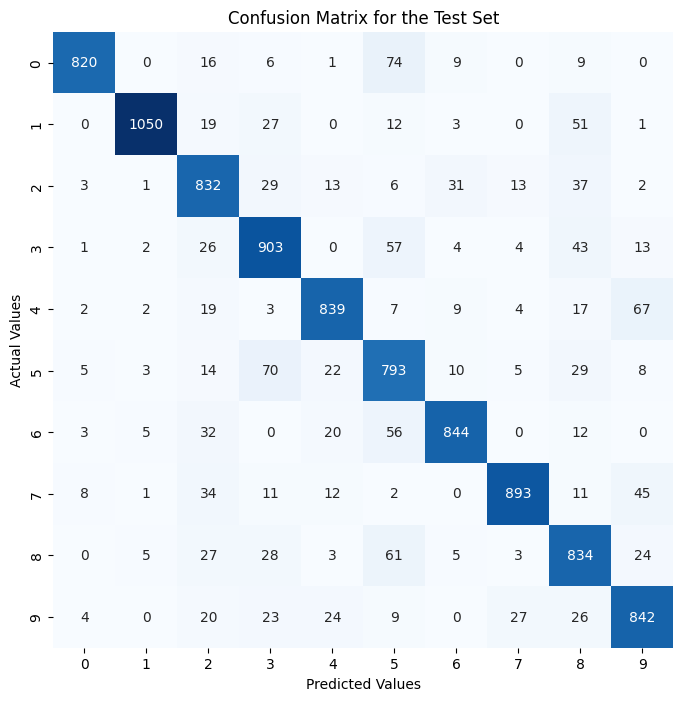


+-------+----------+--------------------+--------------------+
| Digit | Accuracy | Sensitivity (TPR)  | Selectivity (TNR)  |
+-------+----------+--------------------+--------------------+
|   0   |  0.9859  | 0.8770053475935828 | 0.9971318257032543 |
|   1   |  0.9868  | 0.9028374892519346 | 0.9978499490777413 |
|   2   |  0.9658  | 0.860392967942089  | 0.9770840252407837 |
|   3   |  0.9653  | 0.8575498575498576 | 0.9779814462948474 |
|   4   |  0.9775  | 0.8658410732714138 | 0.9894806776658177 |
|   5   |  0.955   | 0.8269030239833159 | 0.9685875456254839 |
|   6   |  0.9801  | 0.8683127572016461 | 0.992135578201152  |
|   7   |  0.982   | 0.8780727630285152 | 0.9937660024490704 |
|   8   |  0.9609  | 0.8424242424242424 | 0.9739178690344062 |
|   9   |  0.9707  | 0.8635897435897436 | 0.9822714681440443 |
+-------+----------+--------------------+--------------------+

Total test Set Accuracy:  86.50%


In [ ]:
# Calculate and display confusion matrix on the entire test set
subset_predictions_test = np.argmax(XTest @ minW, axis=1)
cor_test = np.sum(subset_predictions_test == yTest.values)

# Display confusion matrix for the entire test set
confusion_matrix_test = confusion_matrix(yTest, subset_predictions_test)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for the Test Set')
plt.show()

# Display metrics for the entire test set

table_headers = ["Digit", "Accuracy", "Sensitivity (TPR)", "Selectivity (TNR)"]
table_data = []

for letter in range(10):
    TP = confusion_matrix_test[letter, letter]
    TN = np.sum(np.delete(np.delete(confusion_matrix_test, letter, axis=0), letter, axis=1))
    FP = np.sum(confusion_matrix_test[:, letter]) - TP
    FN = np.sum(confusion_matrix_test[letter, :]) - TP

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    selectivity = TN / (TN + FP) if (TN + FP) > 0 else 0

    table_data.append([letter, accuracy, sensitivity, selectivity])

# Display metrics in a table
print()
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))
print(f"\nTotal test Set Accuracy: {100 * cor_test / len(yTest) : .2f}%")

As can be seen from the statistics the implementation provides a high accuracy predictions for each of the digits. Only down is a slightly high running time